# portfolio theory: combined sharpe ratio of strategies/managers given sharpe and correlation

we assume that each manager has a sharpe ratio of 1 and a static pairwise correlation to the other managers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

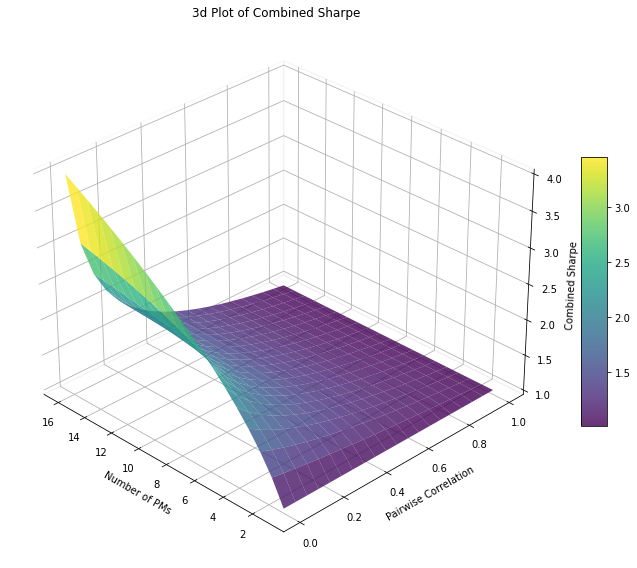

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')

#create figure
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

#generate data
n_managers = np.linspace(1, 16, 20)
pairwise_corr = np.linspace(0, 1, 20)
n_managers_mesh, pairwise_corr_mesh = np.meshgrid(n_managers, pairwise_corr)

#calculate combined sharpe
#portfolio theory: sharpe_combined = sharpe_individual * sqrt(n) / sqrt(1 _ (n-1) * correlation)
sharpe_individual = 1
sharpe_combined = sharpe_individual * np.sqrt(n_managers_mesh) / np.sqrt(1 + (n_managers_mesh - 1) * pairwise_corr_mesh)

#create 3d surface plot
surf = ax.plot_surface(
    n_managers_mesh,
    pairwise_corr_mesh,
    sharpe_combined,
    cmap=cm.viridis,
    linewidth = 0.3,
    antialiased = True,
    alpha = 0.9
)

#labels and title
ax.set_xlabel('Number of PMs')
ax.set_ylabel('Pairwise Correlation')
ax.set_zlabel('Combined Sharpe')
ax.set_title('3d Plot of Combined Sharpe')

ax.view_init(elev=25, azim=135)

#add colorbar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax.invert_xaxis()
ax.set_zlim(1,4)

# Customize grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True)

plt.tight_layout()
plt.show()